### Read Data into Pandas Data Frames

In [1]:
trainFile = "adult_train.csv" #Change it to your local directory
testFile = "adult_test.csv"

import pandas as pd
trainData = pd.read_csv(trainFile, sep=",", header=0)
testData = pd.read_csv(testFile, sep=",", header=0)
trainData.head()

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Get X and Y from Training Data

In [2]:
X1 = trainData.iloc[:, 0:14]
X2 = testData.iloc[:, 0:14]
Y1 = trainData.iloc[:, 14]
Y2 = testData.iloc[:, 14]
frames = [X1, X2]
X = pd.concat(frames)

import category_encoders as ce
le =  ce.OneHotEncoder(return_df=True,impute_missing=False,handle_unknown="ignore")
X_encoded = le.fit_transform(X)
X_encoded_train = X_encoded.iloc[0:X1.shape[0], :]
X_encoded_test = X_encoded.iloc[X1.shape[0]:X_encoded.shape[0], :]

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
X_encoded.head()

,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,education_1,...,native_country_39,native_country_40,native_country_41,native_country_42,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,39,77516,13,2174,0,40
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,50,83311,13,0,0,13
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,38,215646,9,0,0,40
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,53,234721,7,0,0,40
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,28,338409,13,0,0,40


### Section 2. Train the Random Forest Model

In [4]:
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, \
                             random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
clf.fit(X_encoded_train, Y1)
print(clf.feature_importances_)
print(X_encoded_train.columns)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[8.28216621e-05 7.95487563e-04 1.02853365e-03 5.89462751e-04
 1.39753285e-04 4.13374711e-04 4.08067143e-03 0.00000000e+00
 0.00000000e+00 2.00769036e-02 4.26656977e-03 1.85334637e-03
 1.80976041e-02 2.65322372e-04 7.29534473e-04 6.67220484e-05
 7.02821812e-05 7.68491368e-04 5.35422686e-03 9.40283315e-03
 2.03124126e-04 4.29094820e-04 1.62329545e-04 4.41923155e-05
 1.59175588e-05 8.71639686e-02 1.61471181e-01 4.61778477e-03
 6.58135082e-05 2.19678542e-04 0.00000000e+00 9.40968628e-04
 1.27126495e-03 2.48849928e-02 2.16606037e-03 2.22875534e-02
 8.66498133e-03 2.75023926e-04 3.46607740e-04 5.98679057e-04
 1.22949774e-03 8.51791626e-04 4.18144643e-04 4.07798026e-04
 7.17092484e-05 0.00000000e+00 7.52407205e-05 2.27187720e-02
 1.06069433e-01 1.35665768e-02 3.61200026e-02 7.06529516e-03
 2.64026383e-04 8.10728703e-04 6.46789280e-04 1.05205168e-04
 1.22108485e-04 5.93579514e-05 2.74771185e-02 1.99493951e-02
 2.52065887e-04 0.00000000e+00 0.00000000e+00 4.29605327e-05
 3.56509375e-05 8.208827

### Plot the Feature Importance

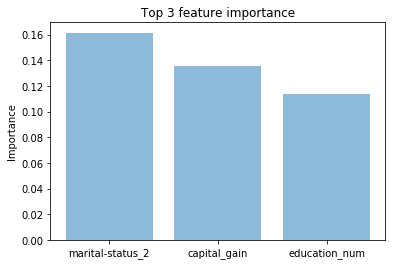

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
feature_importance = list(clf.feature_importances_)
feature_names = list(X_encoded_train.columns)
top_features = 3
sorted_index= sorted(range(len(feature_importance)), key=lambda k: feature_importance[k], reverse=True)
top_feature_importance = [feature_importance[i] for i in sorted_index[0:top_features]]
top_feature_names = [feature_names[i] for i in sorted_index[0:top_features]]

y_pos = np.arange(top_features)
plt.bar(y_pos, top_feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, top_feature_names)
plt.ylabel('Importance')
plt.title('Top %d feature importance'%top_features)
 
plt.show()

### Predict the Testing Data and Evaluate

In [6]:
import numpy as np
Y_test_hat = clf.predict(X_encoded_test)
Accuracy = [1 for i in range(len(Y_test_hat)) if Y2.iloc[i] == Y_test_hat[i]]
Accuracy = round(float(np.sum(Accuracy))/len(Y_test_hat)*100,2)
print("Accuracy on Testing Data = %.2f%%"%Accuracy)

Accuracy on Testing Data = 83.93%


### Section 3. Train the Gradient Boosted Decision Trees Model

In [7]:
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0
learning_rate = 0.05

from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier(n_estimators=nTrees, loss='deviance', learning_rate=learning_rate, max_depth=max_depth, \
                                    min_samples_leaf=min_node_size)
gbm_clf.fit(X_encoded_train, Y1)
print(gbm_clf.feature_importances_)

[6.29643892e-04 1.37415827e-02 2.00616613e-03 1.15747049e-02
 9.04349698e-03 1.02792158e-06 3.63410778e-03 0.00000000e+00
 0.00000000e+00 1.76281499e-03 4.78914398e-04 0.00000000e+00
 4.23354361e-04 0.00000000e+00 7.89180296e-04 1.42977364e-05
 3.99336181e-04 0.00000000e+00 9.06271975e-04 1.58991790e-03
 0.00000000e+00 3.68200948e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.68553618e-03 1.71800144e-01 2.74475521e-04
 3.97501643e-05 2.32381176e-04 2.36826995e-03 8.84058754e-05
 2.97997982e-03 3.11896038e-02 3.71240744e-03 2.21985785e-02
 1.64838111e-02 1.04968033e-02 2.15098094e-04 1.83189520e-03
 1.43625567e-02 1.14466938e-03 1.35973835e-02 2.34555638e-04
 5.71489493e-03 0.00000000e+00 0.00000000e+00 3.25198569e-03
 4.46105086e-03 1.86719066e-02 2.09755189e-03 1.02788739e-03
 1.64963460e-04 4.28344340e-03 1.80236519e-03 2.76117198e-04
 6.09161483e-04 0.00000000e+00 8.24957799e-03 4.81932039e-03
 3.71884355e-03 4.64400253e-04 0.00000000e+00 8.09055802e-05
 1.05113510e-03 7.221177

### Predict the Testing Data and Evaluate

In [8]:
import numpy as np
Y_test_hat = gbm_clf.predict(X_encoded_test)
Accuracy = [1 for i in range(len(Y_test_hat)) if Y2.iloc[i] == Y_test_hat[i]]
Accuracy = round(float(np.sum(Accuracy))/len(Y_test_hat)*100,2)
print("Accuracy on Testing Data = %.2f%%"%Accuracy)

Accuracy on Testing Data = 87.26%


In [13]:
import category_encoders
import inspect
inspect.getfile(category_encoders)

'/anaconda3/lib/python3.6/site-packages/category_encoders/__init__.py'